In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
def get_dims(area):
    """
    Returns a tuple with dimensions of a 2:1 box given the area (width, length)
    Args:
        area: area of the box
    """
    l = (area) ** (1 / 2)
    w = 2 * l
    return (w, l)

def funnel_plot(ns):
    """
    Creates a plot showing how samples are selected during data cleaning

    Args:
        ns (list(tuples)): List of tuples that gives [0] - # of sample left after [1] the described data filter
    """
    # matplotlib settings
    plt.rcParams["figure.figsize"] = [30, 10]
    plt.rcParams.update({"font.size": 16})

    # make empty plot
    fig, ax = plt.subplots()
    ax.plot()

    # get box widths (dependent on # of samples)
    ws = []
    for n in ns[:-1]:
        w, l = get_dims(n[0])
        ws.append(w)
    # get box heights (depending on # of filter steps)
    h = ws[0] / len(ns)
    # calculate x,y of bottom left corner of each box
    xs = (max(ws) - np.array(ws)) / 2
    ys = np.linspace(0, h * (len(ns) - 1), len(ns))
    # calculate coordinates to place annocations
    ys_txt = ys + h / 2
    x_txt = (xs[0] + ws[0]) / 2
    xs_txt2 = (xs + np.array(ws)) * 1.01

    # For each data filtration step
    for n in range(0, len(xs)):

        # if more steps than colors, loop again through colors
        col_n = n if n <= 6 else n - 6

        # add boxes (use white 0.5 alpha box to keep colors light)
        ax.add_patch(
            plt.Rectangle(
                (xs[n], -ys[n]), ws[n], -h, edgecolor="black", facecolor="white", lw=3
            )
        )
        # Write Number of strains in box center
        ax.text(
            x_txt,
            -ys_txt[n],
            str(ns[n][0]),
            ha="center",
            va="center",
        )
        # Write description of data filtering step performed
        ax.text(xs_txt2[n], -ys_txt[n], ns[n][1], ha="left", va="center")

    # TODO: Make limit setting more robust
    # TODO: Add Arrows at the bottom showing # of groups

    y_arrows = -ys[-1] - h * 1.2
    x_larrow = x_txt - x_txt / 4
    x_rarrow = x_txt + x_txt / 6
    ns[-1]
    ax.text(
        x_larrow,
        y_arrows,
        str(ns[-1][0][0]) + " " + ns[-1][0][1],
        rotation=45,
        bbox=dict(boxstyle="larrow,pad=0.5", fc="white", lw=2),
    )
    ax.text(
        x_rarrow,
        y_arrows - h * 0.05,
        str(ns[-1][1][0]) + " " + ns[-1][1][1],
        rotation=-45,
        bbox=dict(boxstyle="rarrow,pad=0.5", fc="white", lw=2),
    )
    ax.text(
        x_txt,
        y_arrows - h * 0.2,
        str(ns[-1][2][0]) + " " + ns[-1][2][1],
        size=18,
        rotation=90,
        bbox=dict(boxstyle="larrow,pad=0.5", fc="white", lw=2),
    )

    ax.set_xlim(0, max(ws) * 1.38)
    ax.set_ylim(-ys[-1] - h * 2, 0)
    ax.set_frame_on(False)
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    return

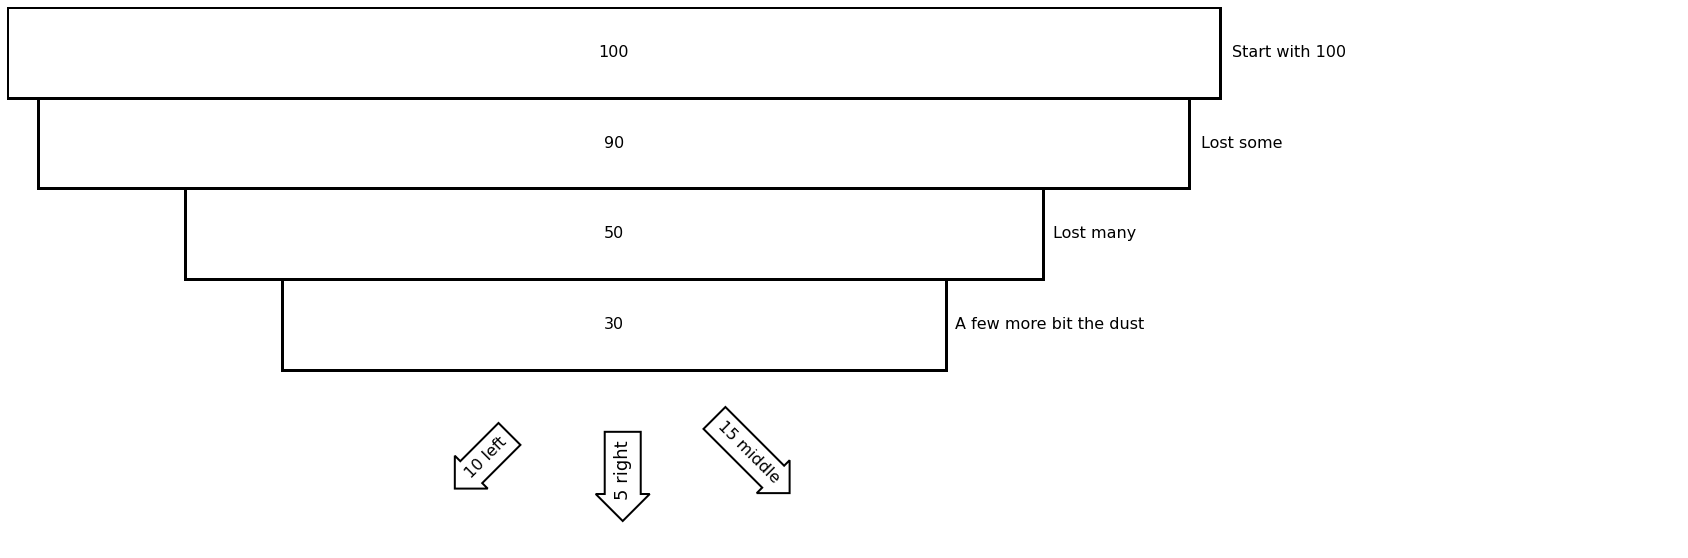

In [15]:
ns = [(100,'Start with 100'),
     (90, 'Lost some'),
     (50, 'Lost many'),
     (30, 'A few more bit the dust'),
     ((10,'left'), (15, 'middle'), (5, 'right'))]

funnel_plot(ns)